Processamento realizado utilizando o método disponível através do link abaixo:
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import math

In [3]:
#importar tabelas

In [4]:
db = pd.read_excel ('20191220.xlsx')

db.head()

,Atividade,Bloco,Fazenda,UP,Talhão,Parcela,Ciclo,Rotação,Data de Medição,Equipe,...,Espécie,Dominante,ErroArvore,ObsParcela,ErroParcela,NomeArquivo,d1_Anterior,d2_Anterior,DAP_anterior,H_Anterior
0,IFC,.,Suzano,Suzano,1,100,.,0,2019-12-18,Diêgo Dayrell Rodrigues,...,.,.,.,3 árvores da parcela foram danificadas pela cu...,.,E:\Clientes\Klabin\20191220_064926_C.opt,0,0,0,0
1,IFC,.,Suzano,Suzano,1,100,.,0,2019-12-18,Diêgo Dayrell Rodrigues,...,.,.,.,4 árvores da parcela foram danificadas pela cu...,.,E:\Clientes\Klabin\20191220_064926_C.opt,0,0,0,0
2,IFC,.,Suzano,Suzano,1,100,.,0,2019-12-18,Diêgo Dayrell Rodrigues,...,.,.,.,5 árvores da parcela foram danificadas pela cu...,.,E:\Clientes\Klabin\20191220_064926_C.opt,0,0,0,0
3,IFC,.,Suzano,Suzano,1,100,.,0,2019-12-18,Diêgo Dayrell Rodrigues,...,.,.,.,6 árvores da parcela foram danificadas pela cu...,.,E:\Clientes\Klabin\20191220_064926_C.opt,0,0,0,0
4,IFC,.,Suzano,Suzano,1,100,.,0,2019-12-18,Diêgo Dayrell Rodrigues,...,.,.,.,7 árvores da parcela foram danificadas pela cu...,.,E:\Clientes\Klabin\20191220_064926_C.opt,0,0,0,0


In [5]:
import math

In [6]:
db['DAP'] = db['CAP']/math.pi

In [7]:
print(db['DAP'])

0      159.473253
1      272.791572
2      179.845086
3      103.769023
4      164.566211
5      162.656352
6      156.290154
7      225.681709
8      262.287346
9        0.000000
10     199.898609
11     196.397200
12      42.971835
13     164.884521
14      68.436626
15     219.952131
16     140.374660
17     233.957766
18       0.000000
19     289.980306
20      84.670430
21     293.481715
22     150.560576
23     263.878896
24      85.307049
25     131.143673
26     214.540863
27     245.735232
28     110.135221
29     213.585934
          ...    
497     95.811276
498     67.800006
499    231.729597
500    105.360572
501    149.287337
502      0.000000
503    208.174666
504    140.374660
505    197.033820
506     31.512679
507    233.957766
508    228.228188
509    184.938044
510    151.197196
511    228.864808
512     65.890146
513    229.501428
514    227.591569
515      0.000000
516    247.645091
517      0.000000
518    234.912696
519    226.318329
520     94.538036
521    145

In [8]:
print(db[['Parcela','Arvore','CAP','DAP']])

     Parcela  Arvore  CAP         DAP
0        100       1  501  159.473253
1        100       2  857  272.791572
2        100       3  565  179.845086
3        100       4  326  103.769023
4        100       5  517  164.566211
5        100       6  511  162.656352
6        100       7  491  156.290154
7        100       8  709  225.681709
8        100       1  824  262.287346
9        100       2    0    0.000000
10       100       3  628  199.898609
11       100       4  617  196.397200
12       100       5  135   42.971835
13       100       6  518  164.884521
14       100       7  215   68.436626
15       100       8  691  219.952131
16       100       9  441  140.374660
17       100      10  735  233.957766
18       100       1    0    0.000000
19       100       2  911  289.980306
20       100       3  266   84.670430
21       100       4  922  293.481715
22       100       5  473  150.560576
23       100       6  829  263.878896
24       100       7  268   85.307049
25       100

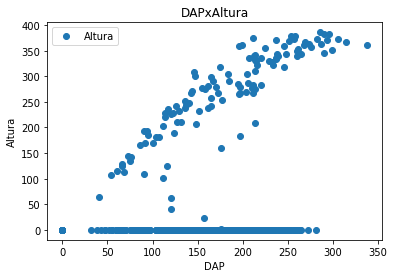

In [61]:
db.plot (x='DAP', y='Altura', style='o')
plt.title ('DAPxAltura')
plt.xlabel('DAP')
plt.ylabel('Altura')
plt.show()

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


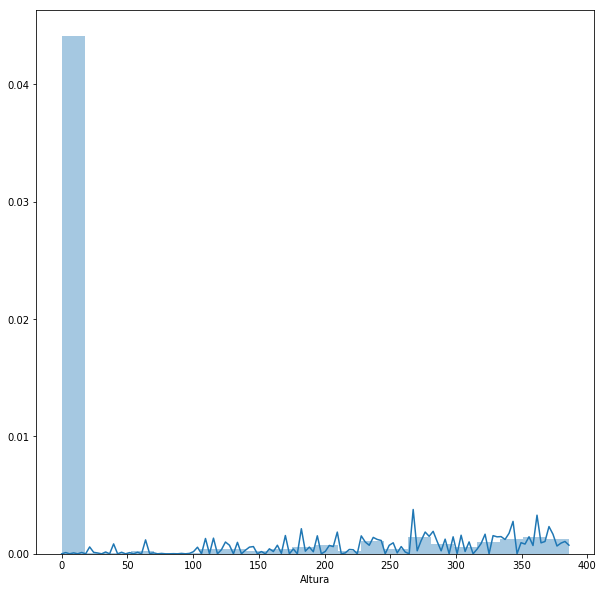

In [56]:
plt.figure(figsize=(10,10))
plt.tight_layout()
seabornInstance.distplot(db['Altura'])

In [17]:
X = db['DAP'].values.reshape(-1,1)
y = db['Altura'].values.reshape(-1,1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-20.96507732]
[[0.54495836]]


In [21]:
y_pred = regressor.predict(X_test)

In [22]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.0,85.369356
1,281.0,66.981999
2,0.0,84.328563
3,0.0,106.532164
4,291.0,70.104381
5,0.0,98.899676
6,0.0,-20.965077
7,0.0,104.970973
8,0.0,92.654913
9,0.0,-20.965077
